# Obtaining a Data Frame From Scraping All Books Available in Lectulandia

<b>Author: Christian Guerra</b>

<b>Date: January 24 2022</b>

On this Jupyter Notebook we will obtain a dataframe with all of the books available in lectulandia, this process will be explained step by step in this notebook. The database will include Author, Title, Genre, Author Country, Author Language, PDF download link, Epub download link.

You could access the Lectulandia website here: https://www.lectulandia.co

This information is useful since it is one of the largest websites to obtain books in the Spanish language, access to this information is harder to obtain than in English and creating a database could be useful for machine learning projects.

### Importing Packages:

In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping
import requests  # this module helps us obtain the web page
import pandas as pd
import numpy as np

## Part 1: Creating a database from the first page

Lectulandia has a section called 'Libros' were we could view every book that is available to download on the site. There are 24 books per page and more than 1.900 pages to scroll through.

We will use BeautifulSoup to extract data from the website. We use 'html' and 'response.content' since this obtains spanish characters like accents and ñ.

In part 1 we obtain information only from the first page of the list of books. Our columns will be: author, book, book website.

### <b>Screenshot of the 1st page:</b>

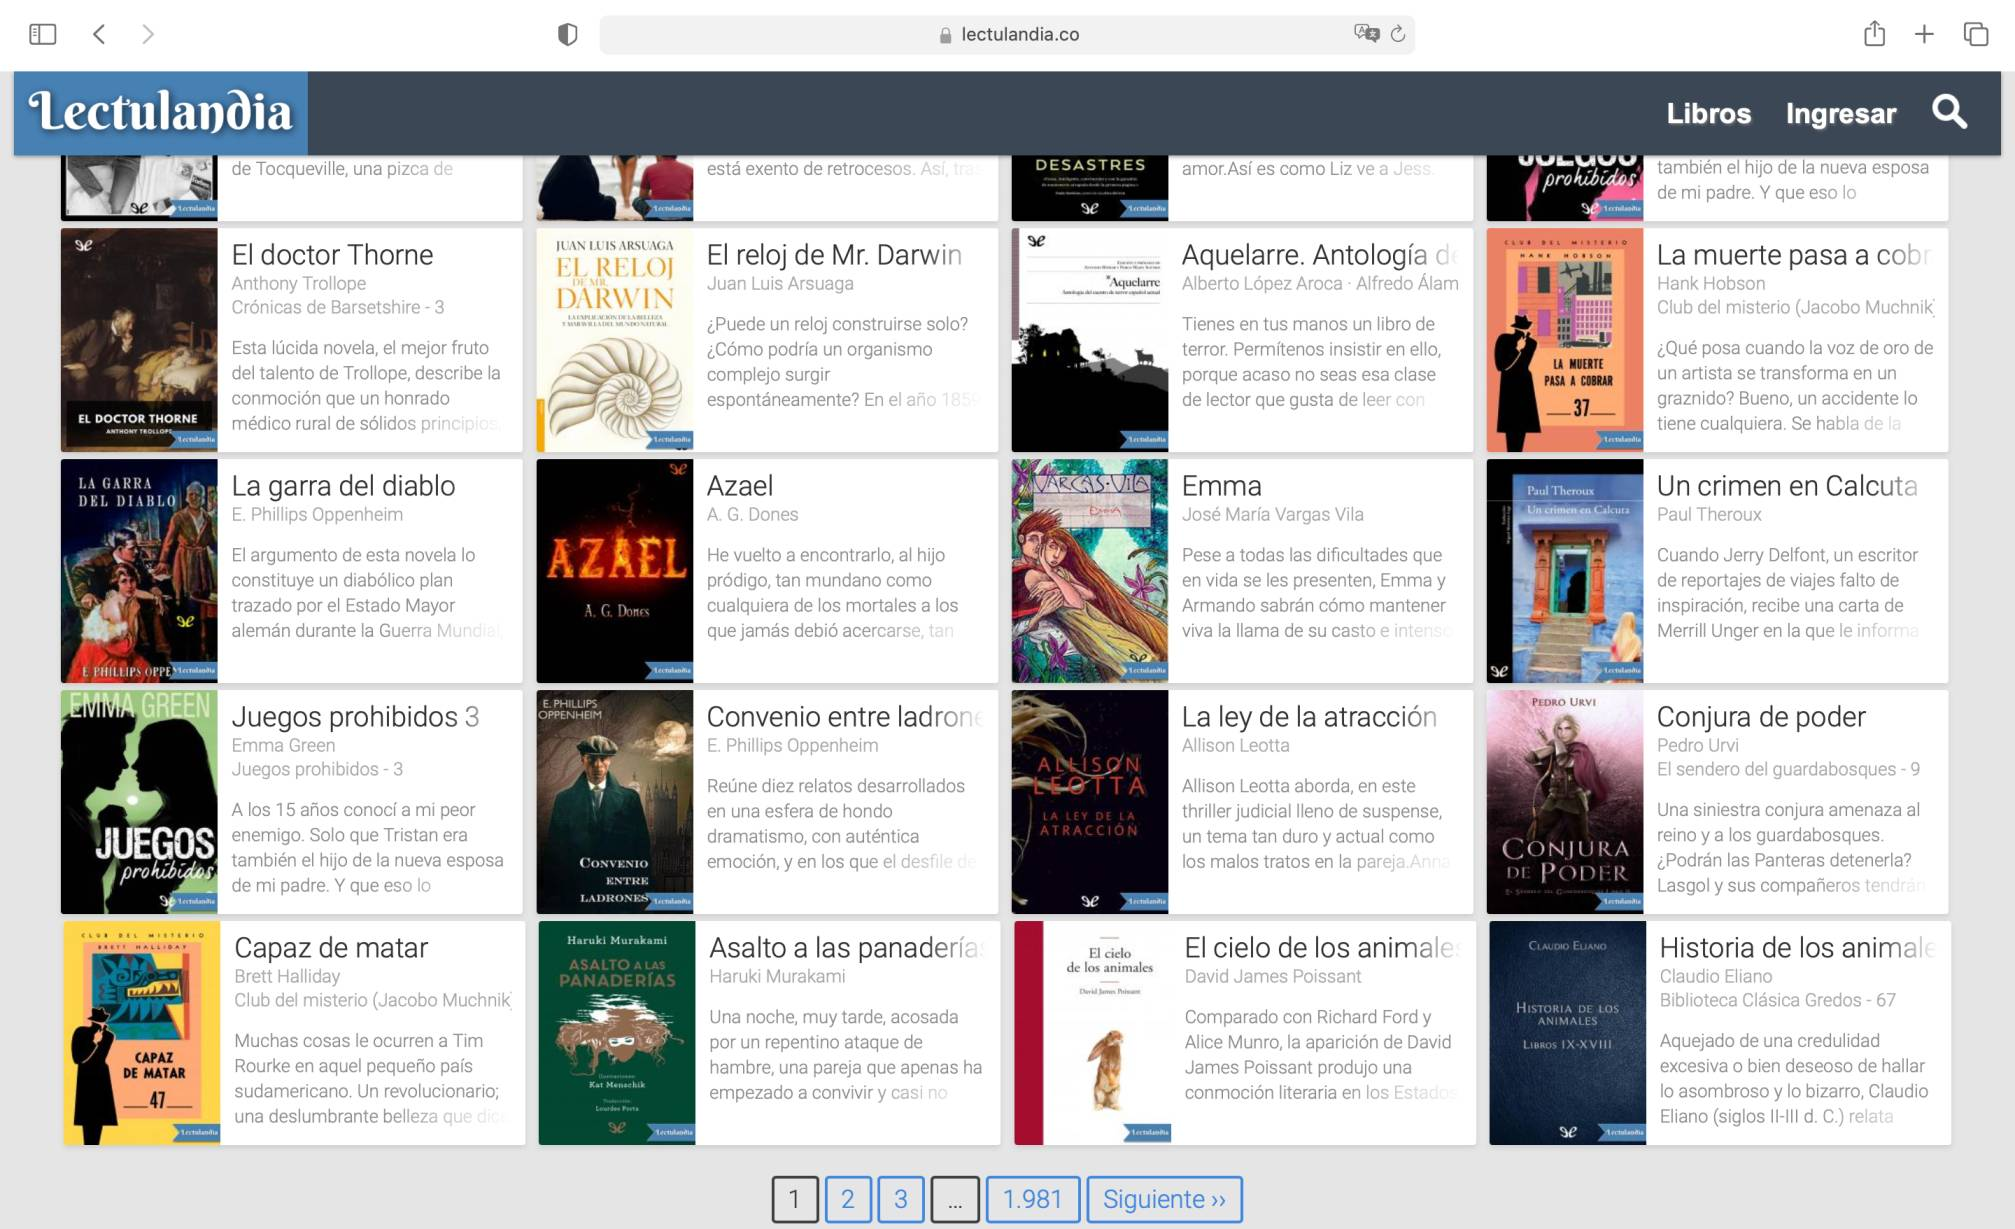



### Review of website with Beautiful Soup:

In [27]:
url = 'https://ww3.lectulandia.co/book/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html')

### Loading created functions for this section:

In [29]:
# Function to extract the list of authors from the website
def get_author(soup_element):    
    _list = []
    
    for line in soup_element.findAll('div', {"class": "subdetail"}): # We loop through every site with book info
        try:
            # if this is an author line we append, it will be -1 if not available
            author_type = line.a.get('href').find('autor')
            if author_type != -1:
                _list.append(line.a.text)
        except Exception: 
            # if the author information hasnt been entered
            # it will display an error, we enter the value as a nan
            # since the information is not available
            _list.append(np.nan)

    return _list

#Function to extract the list of titles and websites to access them
def get_title_and_website(soup_element):
    url = 'https://ww3.lectulandia.co'
    
    title_list = []
    website_list = []
    
    for line in soup_element.findAll('div')[0].findAll('a', {"class": "title"}):
        
        title_list.append(line.get('title'))
        website_list.append(url + line.get('href'))
    
    return title_list, website_list
    

### Obtaining Data:

We now obtain the scrapped data and add it to the dataframe, we see we have 24 entries, this is the amount of books available per page.

In [30]:
df = pd.DataFrame({'author': get_author(soup), 
                   'title': get_title_and_website(soup)[0],
                  'website': get_title_and_website(soup)[1]})

print('Number of Entries:', df.shape[0])
df.head()

Number of Entries: 24


,author,title,website
0,Raúl Garbantes,Miedo en tu cadáver,https://ww3.lectulandia.co/book/miedo-en-tu-ca...
1,Carolina Meloni,"Feminismos fronterizos: mestizas, abyectas y p...",https://ww3.lectulandia.co/book/feminismos-fro...
2,María Elvira Roca Barea,Las brujas y el inquisidor,https://ww3.lectulandia.co/book/las-brujas-y-e...
3,Barbara Delinsky,Una segunda oportunidad,https://ww3.lectulandia.co/book/una-segunda-op...
4,Alberto Moravia,Cuentos romanos,https://ww3.lectulandia.co/book/cuentos-romano...


## Part 2: Web Scrapping the complete list of books

We will do the same process as before but this time we will loop through every page to obtain the complete list of books.

In [31]:
# We need to know what is the last page to iterate through, since books
# get uploaded all the time this is not static and will change on a daily basis


# The number of the hyperlink to the last page
total_sites = soup.findAll('a', {"class": "page-numbers"})[2] 

# By hav
total_sites = int(total_sites.text.replace(".","")) # We convert this to an int
print('Number of Websites to Scrap:', total_sites)

Number of Websites to Scrap: 2348


In [32]:
#for site in range(2, total_sites+1):
for site in range(2, 4):
    
    # We read each page url and connect with BeautifulSoup
    url = 'https://www.lectulandia.co/book/page/' + str(site) + '/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html')
    
    # We append the extracted data to our final dataframe
    df_temp = pd.DataFrame({'author': get_author(soup), 
                   'title': get_title_and_website(soup)[0],
                  'website': get_title_and_website(soup)[1]})
    
    df = pd.concat([df, df_temp], ignore_index=True)
    
    # print to know progress, this will slow down processing speed
    # but is useful to know where errors might occur
    
    print(str(int(site/total_sites*100))+'%', 'row: ' + str(site) , end = "\r")
    

print('Number of Rows:', df.shape[0])

Number of Rows: 72


In [33]:
def scrape_books(total_sites):
    df = pd.DataFrame()  # Initialize an empty DataFrame

    for site in range(1, total_sites + 1):
        # Generate the URL for the current page
        url = f'https://www.lectulandia.co/book/page/{site}/'
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the data for the current page
        data = {
            'author': get_author(soup),
            'title': get_title_and_website(soup)[0],
            'website': get_title_and_website(soup)[1]
        }
        
        # Create a temporary DataFrame for the current page
        df_temp = pd.DataFrame(data) if site == 1 else pd.DataFrame(data)
        
        # Append the data from the current page to the main DataFrame
        df = pd.concat([df, df_temp], ignore_index=True)

        # Print progress
        print(f"{int(site / total_sites * 100)}%", f"row: {site}", end="\r")

    print('\nNumber of Rows:', df.shape[0])
    return df

# Example usage
total_sites = 1
df_books = scrape_books(total_sites)
df_books

100% row: 1
Number of Rows: 24


,author,title,website
0,Raúl Garbantes,Miedo en tu cadáver,https://ww3.lectulandia.co/book/miedo-en-tu-ca...
1,Carolina Meloni,"Feminismos fronterizos: mestizas, abyectas y p...",https://ww3.lectulandia.co/book/feminismos-fro...
2,María Elvira Roca Barea,Las brujas y el inquisidor,https://ww3.lectulandia.co/book/las-brujas-y-e...
3,Barbara Delinsky,Una segunda oportunidad,https://ww3.lectulandia.co/book/una-segunda-op...
4,Alberto Moravia,Cuentos romanos,https://ww3.lectulandia.co/book/cuentos-romano...
5,Manuel Zapata Olivella,Tierra mojada,https://ww3.lectulandia.co/book/tierra-mojada/
6,Jane Mackenna,Lady Valentina,https://ww3.lectulandia.co/book/lady-valentina/
7,Charles Eric Maine,La mente del señor Soames,https://ww3.lectulandia.co/book/la-mente-del-s...
8,José María Merino,Las puertas de lo posible,https://ww3.lectulandia.co/book/las-puertas-de...
9,Manuel Zapata Olivella,Calle 10,https://ww3.lectulandia.co/book/calle-10/


We now have a table with all of the authors, book titles and websites for each book.

In [13]:
df.tail()

,author,title,website
67,Leila Guerriero,Frutos extraños: (crónicas reunidas 2001-2008),https://www.lectulandia.co/book/frutos-extrano...
68,Luna Miguel,El coloquio de las perras,https://www.lectulandia.co/book/el-coloquio-de...
69,C. S. Goto,Ascensión,https://www.lectulandia.co/book/ascension-warh...
70,Francisco González Ledesma,La dama de Cachemira,https://www.lectulandia.co/book/la-dama-de-cac...
71,Orson Scott Card,Alvin el aprendiz,https://www.lectulandia.co/book/alvin-el-apren...


## Part 3: Adding information of each book

Each individual page has additional information that we would like to obtain including genre, description, epub download hyperlink and pdf download hyperlink.

### Example of a book website:

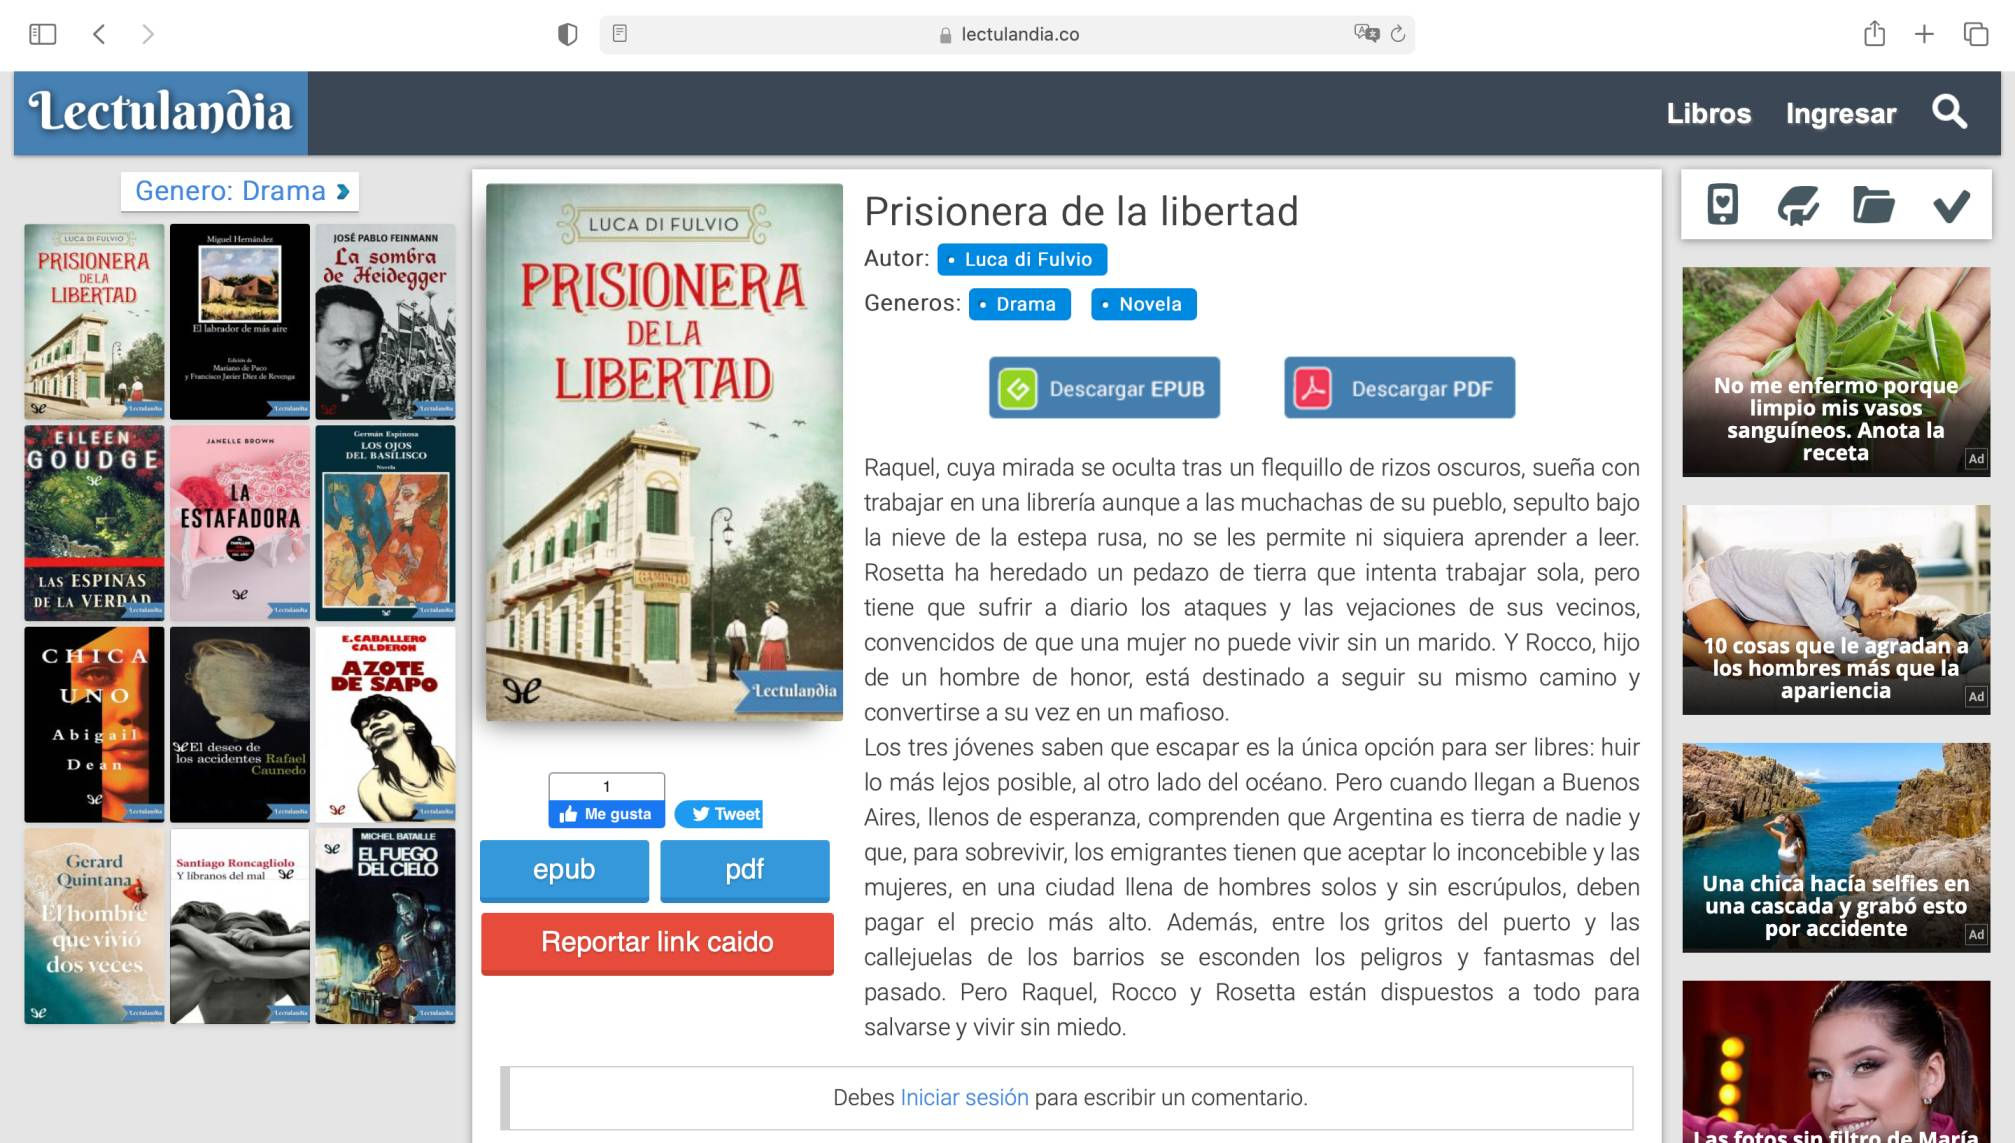

First we load functions created to obtain the information of each column.

In [8]:
# We get the books description:
def get_description(soup_item):

    return soup.find('div', {"class": "realign", "id": "sinopsis"}).text.strip()

# We get the book genre:
def get_genre(soup_item):
    genres = ''
    for line in soup_item.find('div', {"id": "genero"}).findAll('a'):
        genres += line.text + ' / ' # We separate each genre by a '/'
    genres = genres[:-3]
    return genres

# We get the book website
def get_website(soup_item):
    base_url = 'https://www.lectulandia.co'
    download = soup_item.find('div', {"id": "downloadContainer"}).findAll('a')
    for dformat in download:
        # we distinguish the hyperlinks by their format and add accordingly
        # to each column
        if not dformat.find('input', {"value": "epub"}) is None:
            download_epub = base_url + dformat.get('href')
        else:
            download_pdf = base_url + dformat.get('href')
    return download_epub, download_pdf

We create the new columns to be filled:

In [9]:
df['genre'] = np.nan
df['description'] = np.nan
df['epub'] = np.nan
df['pdf'] = np.nan
df.head()

,author,title,website,genre,description,epub,pdf
0,Luca di Fulvio,Prisionera de la libertad,https://www.lectulandia.co/book/prisionera-de-...,NaN,NaN,NaN,NaN
1,Gabi Martínez,Diablo de Timanfaya,https://www.lectulandia.co/book/diablo-de-tima...,NaN,NaN,NaN,NaN
2,Margie Orford,Preciso como un reloj,https://www.lectulandia.co/book/preciso-como-u...,NaN,NaN,NaN,NaN
3,Silvia Clavell,Una princesa rebelde,https://www.lectulandia.co/book/una-princesa-r...,NaN,NaN,NaN,NaN
4,Fran Lebowitz,Un día cualquiera en Nueva York,https://www.lectulandia.co/book/un-dia-cualqui...,NaN,NaN,NaN,NaN


In [10]:
total_sites = df.shape[0]
print('Total Rows to Process:', total_sites)

Total Rows to Process: 47536


Finally we iterate through each books website and obtain more detailed information by book.

In [27]:
for row in range(45693, total_sites):
    # We access each books url
    url = df.loc[row, 'website']
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html')
    
    # We add genre, description and hyperlinks with the created functions
    df.loc[row, 'description'] = get_description(soup)
    df.loc[row,'genre'] = get_genre(soup)
    df.loc[row,'epub'], df.loc[row,'pdf'] = get_website(soup)
    
    # We track progress
    print(str(int(row/total_sites*100))+'%', 'row: ' + str(row) , end = "\r")

df.tail()

,author,title,website,genre,description,epub,pdf
47531,Gary Jennings,Azteca,https://www.lectulandia.co/book/azteca/,Histórico /,Año: 1980\nSinopsis: 'Azteca' está escrita com...,https://www.lectulandia.co/download.php?t=1&d=...,https://www.lectulandia.co/download.php?t=2&d=...
47532,J. K. Rowling,Harry Potter y la cámara secreta,https://www.lectulandia.co/book/harry-potter-y...,Aventuras / Fantástico / Infantil y juvenil / ...,"Tras derrotar una vez más a lord Voldemort, su...",https://www.lectulandia.co/download.php?t=1&d=...,https://www.lectulandia.co/download.php?t=2&d=...
47533,J. K. Rowling,Harry Potter y el prisionero de Azkaban,https://www.lectulandia.co/book/harry-potter-y...,Aventuras / Fantástico / Infantil y juvenil / ...,"Por la cicatriz que lleva en la frente, sabemo...",https://www.lectulandia.co/download.php?t=1&d=...,https://www.lectulandia.co/download.php?t=2&d=...
47534,J. K. Rowling,Harry Potter y el cáliz de fuego,https://www.lectulandia.co/book/harry-potter-y...,Aventuras / Fantástico / Infantil y juvenil / ...,"Tras otro abominable verano con los Dursley, H...",https://www.lectulandia.co/download.php?t=1&d=...,https://www.lectulandia.co/download.php?t=2&d=...
47535,Carlos Ruiz Zafón,El juego del ángel,https://www.lectulandia.co/book/el-juego-del-a...,Intriga /,Año: 2008 Sinopsis:El Juego del Ángel es una g...,https://www.lectulandia.co/download.php?t=1&d=...,https://www.lectulandia.co/download.php?t=2&d=...


## Part 4: Saving Dataframe to a CSV file

As backup we save the file to a csv, this file has utf-8-sig encoding to maintain the spanish characters on the csv file.

In [51]:
df.to_csv("book_df.csv", encoding="utf-8-sig", index="False")

The exported dataframe could be found here:
https://drive.google.com/file/d/1dWVyG7vmrT2aRIFPOMlEvepSRDkuiICS/view?usp=sharing